# Q1. 
Revisit the handwritten digit recognition problem (reproduce results from chapter “Nonlinear Transformation”). Separate digit 1 from all the other digits, using intensity and symmetry as your inputs variables like you did before. Use the same data set sent to you before,

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
data_path = "/Users/chuan/Desktop/c815_course_hws/hw2/Data"
train_data_path = os.path.join(data_path, "DigitsTraining.csv")
test_data_path = os.path.join(data_path, "DigitsTesting.csv")
train_data = np.genfromtxt(train_data_path, delimiter=',')
# extract the first column as it is label
train_labels = train_data[:,0]
# extract the rest columns as it is features
train_features = train_data[:,1:]
# train_data = (train_labels, train_features)

test_data = np.genfromtxt(test_data_path, delimiter=',')
# extract the first column as it is label
test_labels = test_data[:,0]
# extract the rest columns as it is features
test_features = test_data[:,1:]
# test_data = (test_labels, test_features)

# label digit 1 as 1, others as -1
Y_train = np.where(train_labels == 1, 1, -1)
Y_test = np.where(test_labels == 1, 1, -1)

train_features.shape, test_features.shape, Y_train.shape, Y_test.shape

((7291, 256), (2007, 256), (7291,), (2007,))

In [3]:
def cal_avg_intensity(single_digit):
    return np.mean(single_digit)

def cal_symmetry(single_digit):
    # reshape the single_digit to 16*16
    single_digit = single_digit.reshape(16, 16)
    vertical_symmetry = np.mean(np.abs(single_digit - np.flip(single_digit, axis=0)))
    horizontal_symmetry = np.mean(np.abs(single_digit - np.flip(single_digit, axis=1)))
    return (vertical_symmetry + horizontal_symmetry) / 2

In [4]:
# use intensity and symmetry as features, to create a matrix of features X_train
X_train = np.zeros((train_features.shape[0], 2))
X_train[:, 0] = np.apply_along_axis(cal_avg_intensity, 1, train_features)
X_train[:, 1] = np.apply_along_axis(cal_symmetry, 1, train_features)
# also for X_test
X_test = np.zeros((test_features.shape[0], 2))
X_test[:, 0] = np.apply_along_axis(cal_avg_intensity, 1, test_features)
X_test[:, 1] = np.apply_along_axis(cal_symmetry, 1, test_features)

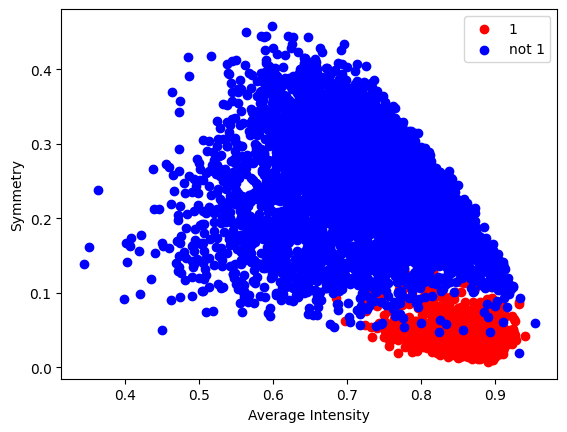

In [5]:
# plot the features
plt.scatter(X_train[Y_train == 1][:, 0], X_train[Y_train == 1][:, 1], c='r', label='1')
plt.scatter(X_train[Y_train == -1][:, 0], X_train[Y_train == -1][:, 1], c='b', label='not 1')
plt.xlabel('Average Intensity')
plt.ylabel('Symmetry')
plt.legend()

In [6]:
class Regression:
    def __init__(self):
        self.weights = None
    
    def fit(self, X, Y): # make sure X is added with bias before calling this function
        self.weights = np.linalg.inv(X.T @ X) @ X.T @ Y
    
    def predict(self, X):
        return np.sign(X @ self.weights)
    
    def mse(self, X, Y):
        return np.mean((Y - self.predict(X)) ** 2)
    
    def third_order_tranform(self, X):
        # with X[i] being [1, x1, x2], we can get [1, x1, x2, x1^2, x2^2, x1x2, x1^3, x2^3, x1^2x2, x2^2x1]
        X_transformed = np.zeros((X.shape[0], 10))
        X_transformed[:, 0:3] = X
        X_transformed[:, 3] = X[:, 1] ** 2
        X_transformed[:, 4] = X[:, 2] ** 2
        X_transformed[:, 5] = X[:, 1] * X[:, 2]
        X_transformed[:, 6] = X[:, 1] ** 3
        X_transformed[:, 7] = X[:, 2] ** 3
        X_transformed[:, 8] = X[:, 1] ** 2 * X[:, 2]
        X_transformed[:, 9] = X[:, 2] ** 2 * X[:, 1]
        return X_transformed

## (a)
Use linear regression for classification. Even though, linear regression learns a real-valued function, binary-valued functions are also real- valued ±1 ∈ R. Thus, you can use linear regression to compute w and approximate your binary classification wT xn ≈ yn = ±1. Use your result for w to compute sign(wT xn) and report the value for Ein and Eout.

In [7]:
Reg = Regression()
# add bias term to X_train, and X_test
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
Reg.fit(X_train, Y_train)
train_mse = Reg.mse(X_train, Y_train)
test_mse = Reg.mse(X_test, Y_test)

In [8]:
print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

Train MSE: 0.06089699629680428
Test MSE: 0.0916791230692576


In [9]:
# check classification accuracy
train_acc = np.mean(Reg.predict(X_train) == Y_train)
test_acc = np.mean(Reg.predict(X_test) == Y_test)
print("In-sample Error Rate: ", 1-train_acc)
print("Out-of-sample Error Rate: ", 1-test_acc)

In-sample Error Rate:  0.015224249074201057
Out-of-sample Error Rate:  0.02291978076731438


## (b) 
Repeat item (a) with a third-order polynomial transform Φ3 to get a different representation of the data.

In [10]:
# perfrom third order polynomial transformation to the features
X_train_poly = Reg.third_order_tranform(X_train)
X_test_poly = Reg.third_order_tranform(X_test)

In [11]:
X_train_poly[1,:] # without bias term, cause the bias term will be added in the fit function

array([1.        , 0.55586914, 0.34355078, 0.3089905 , 0.11802714,
       0.19096928, 0.17175828, 0.04054832, 0.10615393, 0.06560764])

In [12]:
# fit the model
Reg_poly = Regression()
Reg_poly.fit(X_train_poly, Y_train)
train_mse_poly = Reg_poly.mse(X_train_poly, Y_train)
test_mse_poly = Reg_poly.mse(X_test_poly, Y_test)
print(f"Train MSE: {train_mse_poly}")
print(f"Test MSE: {test_mse_poly}")

Train MSE: 0.0565080235907283
Test MSE: 0.07972097658196313


In [13]:
# check classification accuracy
train_acc_poly = np.mean(Reg_poly.predict(X_train_poly) == Y_train)
test_acc_poly = np.mean(Reg_poly.predict(X_test_poly) == Y_test)
print("In-sample Error Rate: ", 1-train_acc_poly)
print("Out-of-sample Error Rate: ", 1-test_acc_poly)

In-sample Error Rate:  0.014127005897682121
Out-of-sample Error Rate:  0.019930244145490827


## (c)
Compare Ein and Eout from (a) and (b).

In [14]:
print(f"Train MSE for polynomial transformation is {train_mse_poly}")
print(f"Train MSE for original features is {train_mse}")
print(f"Test MSE for polynomial transformation is {test_mse_poly}")
print(f"Test MSE for original features is {test_mse}")

Train MSE for polynomial transformation is 0.0565080235907283
Train MSE for original features is 0.06089699629680428
Test MSE for polynomial transformation is 0.07972097658196313
Test MSE for original features is 0.0916791230692576


In [15]:
print(f"In sample error rate for polynomial transformation is {1-train_acc_poly}")
print(f"In sample error rate for original features is {1-train_acc}")
print(f"Out of sample error rate for polynomial transformation is {1-test_acc_poly}")
print(f"Out of sample error rate for original features is {1-test_acc}")

In sample error rate for polynomial transformation is 0.014127005897682121
In sample error rate for original features is 0.015224249074201057
Out of sample error rate for polynomial transformation is 0.019930244145490827
Out of sample error rate for original features is 0.02291978076731438


Either compare in MSE or Accuracy for $E_{in}$ and $E_{out}$, we have $E_{in} < E_{out}$. 


Also, result after polynomial transformation would be better, with $E_{in, poly} < E_{in, original}$, and $E_{out, poly} < E_{out, original}$.

## (d)
Show same plotsof Slide 13 of chapter “Nonlinear Transformation and Logistic Regression’, that is, plots of the classifier boundaries for linear model and 3rd order polynomial model.

In [16]:
X_test

array([[1.        , 0.72782227, 0.30299609],
       [1.        , 0.73486719, 0.318875  ],
       [1.        , 0.66407422, 0.18259766],
       ...,
       [1.        , 0.69114258, 0.33532422],
       [1.        , 0.4900293 , 0.125625  ],
       [1.        , 0.81102344, 0.04883203]])

Text(0.5, 1.0, 'Polynomial Transformation')

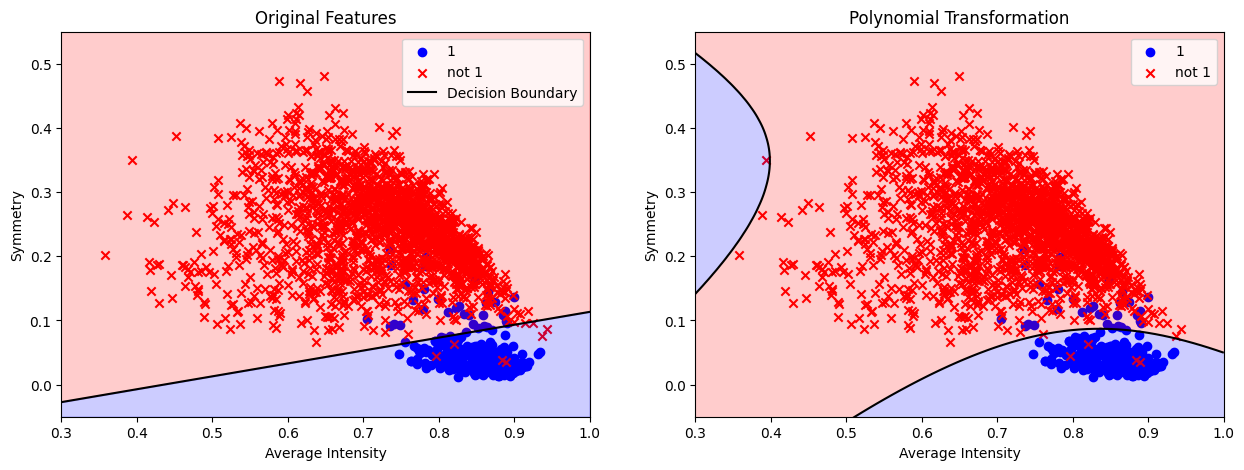

In [17]:
# plot using test data
# 2*1 subplots for original features and polynomial transformation
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# original features
axs[0].scatter(X_test[Y_test == 1][:, 1], X_test[Y_test == 1][:, 2], c='blue', label='1', marker='o')
axs[0].scatter(X_test[Y_test == -1][:, 1], X_test[Y_test == -1][:, 2], c='red', label='not 1', marker='x')
# plot the regression line
x = np.linspace(0, 1, 100)
y = (-Reg.weights[0] - Reg.weights[1] * x) / Reg.weights[2]
axs[0].plot(x, y, label='Decision Boundary', color='black')
axs[0].fill_between(x,y, 1, color='red', alpha=0.2)
axs[0].fill_between(x,y, -0.05, color='blue', alpha=0.2)

# set xlim and ylim to make the plot more clear
axs[0].set_xlim(0.3, 1)
axs[0].set_xlabel('Average Intensity')
axs[0].set_ylim(-0.05, 0.55)
axs[0].set_ylabel('Symmetry')
axs[0].legend()
axs[0].set_title('Original Features')

# polynomial transformation
axs[1].scatter(X_test_poly[Y_test == 1][:, 1], X_test_poly[Y_test == 1][:, 2], c='blue', label='1', marker='o')
axs[1].scatter(X_test_poly[Y_test == -1][:, 1], X_test_poly[Y_test == -1][:, 2], c='red', label='not 1', marker='x')
# plot the third order polynomial regression line
# since the X_poly[i] is [1, x1, x2, x1^2, x2^2, x1x2, x1^3, x2^3, x1^2x2, x2^2x1]
# the decision boundary is w0 + w1*x1 + w2*x2 + w3*x1^2 + w4*x2^2 + w5*x1x2 + w6*x1^3 + w7*x2^3 + w8*x1^2x2 + w9*x2^2x1 = 0
# as a result, there may be multiple decision boundaries, so we need to plot the contour
y = np.linspace(-1, 1, 1000)
X, Y = np.meshgrid(x, y)
Z = Reg_poly.weights[0] + Reg_poly.weights[1] * X + Reg_poly.weights[2] * Y + Reg_poly.weights[3] * X**2 + Reg_poly.weights[4] * Y**2 + Reg_poly.weights[5] * X * Y + Reg_poly.weights[6] * X**3 + Reg_poly.weights[7] * Y**3 + Reg_poly.weights[8] * X**2 * Y + Reg_poly.weights[9] * Y**2 * X
axs[1].contour(X, Y, Z, levels=[0], colors='black')
# fill the area with different colors based on the contour
axs[1].contourf(X, Y, Z, levels=[np.min(Z), 0, np.max(Z)], colors=['red', 'blue'], alpha=0.2)

axs[1].set_xlim(0.3, 1)
axs[1].set_xlabel('Average Intensity')
axs[1].set_ylim(-0.05, 0.55)
axs[1].set_ylabel('Symmetry')
axs[1].legend()
axs[1].set_title('Polynomial Transformation')



# Q2.
Fit auto-regressive (AR) models with regular and stochastic gradient de- scents. Refer to the two-tap predictor example in the slides of chapter 5a. Consider an AR(2) model:
$$x(n) = −w_1x(n − 1) − w_2x(n − 2) + \epsilon(n),$$

where $x(n)$ is a time series data, $x(n − 1)$ and $x(n − 2)$ are the lag 1 and
lag 2 series of $x(n)$, and $\epsilon(n)$ is a Gaussian noise with zero mean.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [19]:
# read data
base_dir = "/Users/chuan/Desktop/c815_course_hws/hw4/data_hw4"
path_data1 = os.path.join(base_dir, "data1.csv")
path_data2 = os.path.join(base_dir, "data2.csv")

In [20]:
data1 = np.genfromtxt(path_data1, delimiter=',')
data2 = np.genfromtxt(path_data2, delimiter=',')
data1.shape, data2.shape

((1000,), (1000,))

In [21]:
# create lag 1 and lag 2 data for both datasets, and set the first row to 0
data1_lag1 = np.zeros(data1.shape)
data1_lag1[1:] = data1[:-1]
data1_lag2 = np.zeros(data1.shape)
data1_lag2[2:] = data1[:-2]

data2_lag1 = np.zeros(data2.shape)
data2_lag1[1:] = data2[:-1]
data2_lag2 = np.zeros(data2.shape)
data2_lag2[2:] = data2[:-2]

In [22]:
class GD:
    def __init__(self, learning_rate=0.1, max_iter=10000, stop_criteria=1e-6, early_stop=True):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.stop_criteria = stop_criteria
        self.weights = None
        self.bias = None
        self.training_errors = []
        self.early_stop = early_stop

    # Standard Gradient Descent
    def original_gradient(self, X, Y):
        # initialize weights
        self.weights = np.zeros(X.shape[1])
        m = X.shape[0]  # Number of samples
        
        for i in range(self.max_iter):
            # compute predictions
            predictions = X.dot(self.weights)
            
            # calculate the gradient
            gradient = (2 / m) * (X.T.dot(predictions - Y))

            # update weights
            self.weights -= self.learning_rate * gradient/2

            # calculate the training error
            training_error = np.mean((Y - predictions) ** 2)
            self.training_errors.append(training_error)
            
            # check for convergence
            if self.early_stop:
                if np.linalg.norm(gradient) < self.stop_criteria:
                    print(f"Converged at iteration {i}")
                    break
        return self.weights

    # Stochastic Gradient Descent
    def stochastic_gradient(self, X, Y):
        # initialize weights
        self.weights = np.zeros(X.shape[1])
        m = X.shape[0]  # number of samples

        for i in range(self.max_iter):
            #for j in range(m):
            j = np.random.randint(0, m)
            # compute predictions
            prediction = X[j].dot(self.weights)
            
            # calculate the gradient
            gradient = 2 * X[j] * (prediction - Y[j])
            
            # update weights
            self.weights -= self.learning_rate * gradient

            # calculate the training error
            training_error = np.mean((Y - X.dot(self.weights)) ** 2)
            self.training_errors.append(training_error)

            # check for convergence
            if self.early_stop:
                if np.linalg.norm(gradient) < self.stop_criteria:
                    print(f"Converged at iteration {i}")
                    break
        return self.weights

## (a) 
Estimate w1 and w2 for the two datasets using regular gradient descent. Write the final values for w1 and w2 for each dataset.

In [23]:
original_gd = GD()
# fit the model, where X is the lag 1 and lag 2 data, and one bias term, and Y is the original data
X = np.vstack((np.ones(data1.shape), data1_lag1, data1_lag2)).T
Y = data1
weights = original_gd.original_gradient(X, Y)
# print w1, w2, not w0
print("w1:", weights[1])
print("w2:", weights[2])

Converged at iteration 3187
w1: -0.4459449377412381
w2: -0.15594109730889713


In [24]:
# also fit for data2
X = np.vstack((np.ones(data2.shape), data2_lag1, data2_lag2)).T
Y = data2
weights = original_gd.original_gradient(X, Y)
print("w1:", weights[1])
print("w2:", weights[2])

Converged at iteration 1146
w1: -0.11396238532127233
w2: -0.8018278712897495


## (b)
Estimate w1 and w2 for the two datasets using stochastic gradient descent, and compare the result with part (a). Write the final values for w1 and w2 for each dataset.

In [25]:
# for data1
stochestic_gd = GD()
X = np.vstack((np.ones(data1.shape), data1_lag1, data1_lag2)).T
Y = data1
weights = stochestic_gd.stochastic_gradient(X, Y)
print("w1:", weights[1])
print("w2:", weights[2])

w1: -0.4163773715798901
w2: -0.21296943798480322


In [26]:
# for data2
stochestic_gd = GD()
X = np.vstack((np.ones(data2.shape), data2_lag1, data2_lag2)).T
Y = data2
weights = stochestic_gd.stochastic_gradient(X, Y)
print("w1:", weights[1])
print("w2:", weights[2])

w1: -0.2324134501136457
w2: -0.7805733656040625


## (c)
Plot the training error as a function of the iteration step using 3 different learning rates on dataset 1 while employing gradient descent

In [27]:
learning_rates = [0.01, 0.005,0.001]
max_iter = 100000

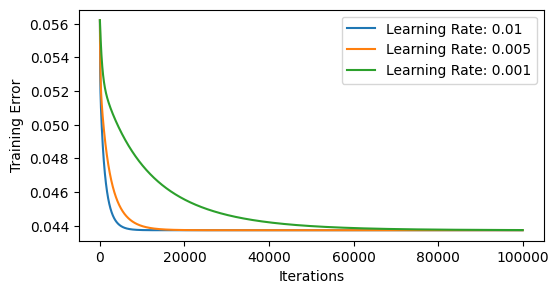

In [28]:
# for data1
X = np.vstack((np.ones(data1.shape), data1_lag1, data1_lag2)).T
Y = data1
learning_errors = []
for lr in learning_rates:
    gd = GD(learning_rate=lr, max_iter=max_iter, early_stop=False)
    weights = gd.original_gradient(X, Y)
    learning_errors.append(gd.training_errors)
# plot the learning curve, if stopped early, fill the curve with the last value
max_len = max([len(errors) for errors in learning_errors])
plt.figure(figsize=(6, 3))
for i, lr in enumerate(learning_rates):
    if len(learning_errors[i]) < max_len:
        learning_errors[i] += [learning_errors[i][-1]] * (max_len - len(learning_errors[i]))
    plt.plot(range(len(learning_errors[i])), learning_errors[i], label=f"Learning Rate: {lr}")
plt.xlabel('Iterations')
plt.ylabel('Training Error')
plt.legend()

# (d)
Plot that training error as a function of the iteration step using 3 different learning rates on dataset 1 while employing stochastic gradient descent.

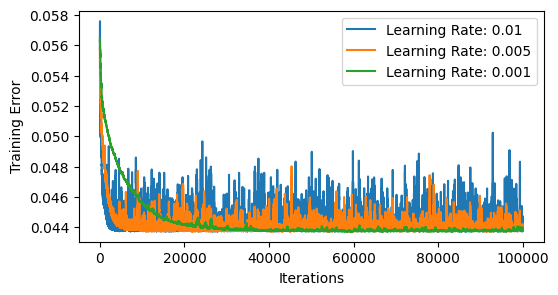

In [29]:
# for data1
learning_errors = []
for lr in learning_rates:
    gd = GD(learning_rate=lr, max_iter=max_iter, early_stop=False)
    weights = gd.stochastic_gradient(X, Y)
    learning_errors.append(gd.training_errors)
# plot the learning curve, if stopped early, fill the curve with the last value
max_len = max([len(errors) for errors in learning_errors])
plt.figure(figsize=(6, 3))
for i, lr in enumerate(learning_rates):
    if len(learning_errors[i]) < max_len:
        learning_errors[i] += [learning_errors[i][-1]] * (max_len - len(learning_errors[i]))
    plt.plot(range(len(learning_errors[i])), learning_errors[i], label=f"Learning Rate: {lr}")
plt.xlabel('Iterations')
plt.ylabel('Training Error')
plt.legend()

### Explain

Through comparison, it is found that unlike the regular gradient descent, the stochastic gradient descent (SGD) shows more fluctuation in terms of error trends, while both of the graphs show certain level of convergence, implying a successful learning.

The reason for this noisy error interpretation for SGD implies is that SGD only update an individual point for each iteration, which will bring larger violitility because not every sample will be a perfect representation for the learning. 